In [1]:
# load packages
library(ggplot2, quietly = T)
library(RColorBrewer, quietly = T)

We will pass our datafarames directly into our plotting functions, rather than passing vectors associated with each variable we want to plot.

In [2]:
# load the data
library(datasets, quietly = T)
data(iris)
df = iris
df[['Species']] = as.character(df$Species)
head(df)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


# Scatter Plot & Syntax

Instead of exploring all the different types of plots and their arguments, we will focus on the simple example of scatter plots to understand syntax and how visualizations can be customized/manipulated from the default.

This notebook is just a small subset of all the customization options available for visualization meant to give you a sense of how using code to generate figures works. Additionally, many of the figure modifications shown here can be done in multiple different ways.


Let's plot the two continuous variables sepal length vs sepal width, and color it by the categorical variable species:

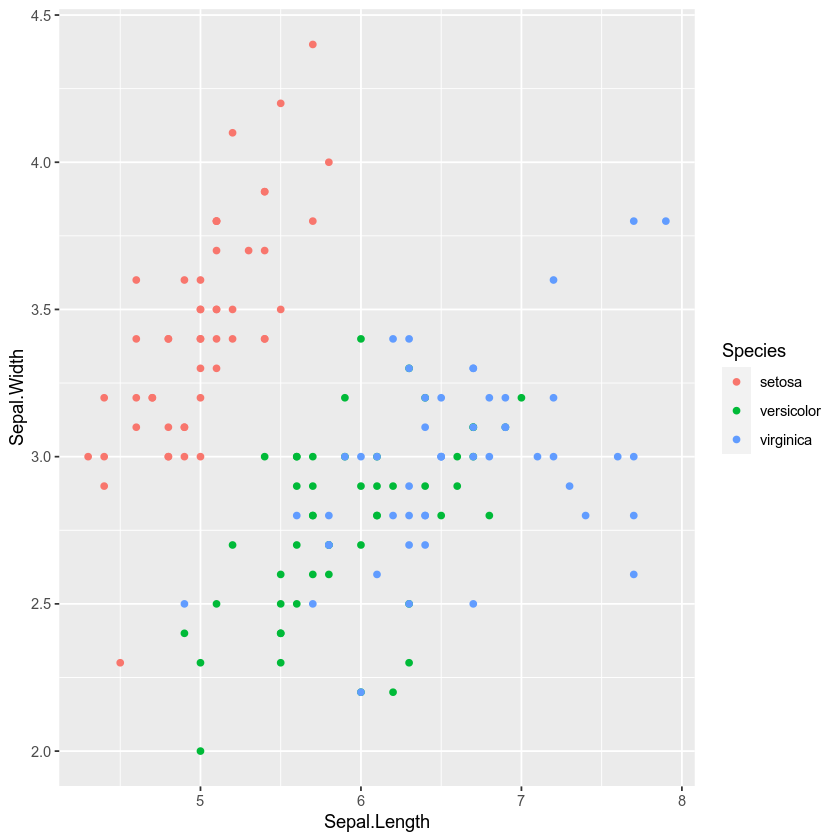

In [3]:
g<-ggplot(data = df, mapping = aes(x = Sepal.Length, 
                                   y = Sepal.Width, color = Species)) + # set up the variables to plot
geom_point()
g

## Coloring

Suppose we want to change the colors for the Species category. We can do so by specifying a color pallette. One popular package for color palettes is RColorBrewer. Their palettes can be found here: https://r-graph-gallery.com/38-rcolorbrewers-palettes.html

Since this is a categorical variable, we want a discrete color palette:

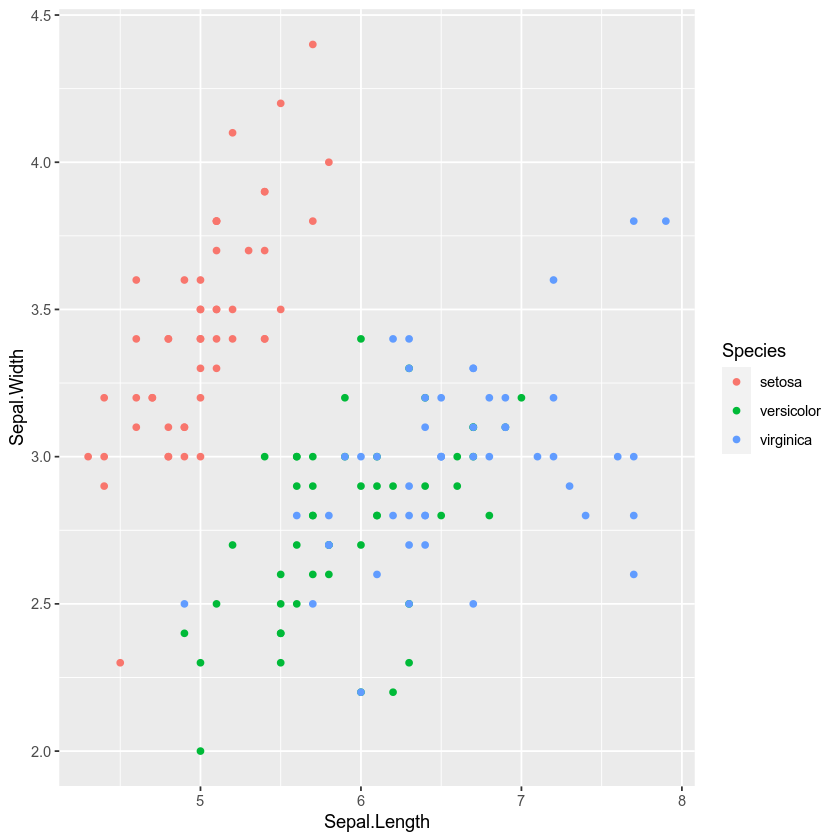

In [4]:
g.main<-ggplot(data = df, mapping = aes(x = Sepal.Length, 
                                   y = Sepal.Width, color = Species)) + # set up the variables to plot
geom_point()+scale_color_brewer(palette = 'Set2')
g

Note, we can also manually specify the colors that we want. Color codes for R can be found here: https://www.nceas.ucsb.edu/sites/default/files/2020-04/colorPaletteCheatsheet.pdf

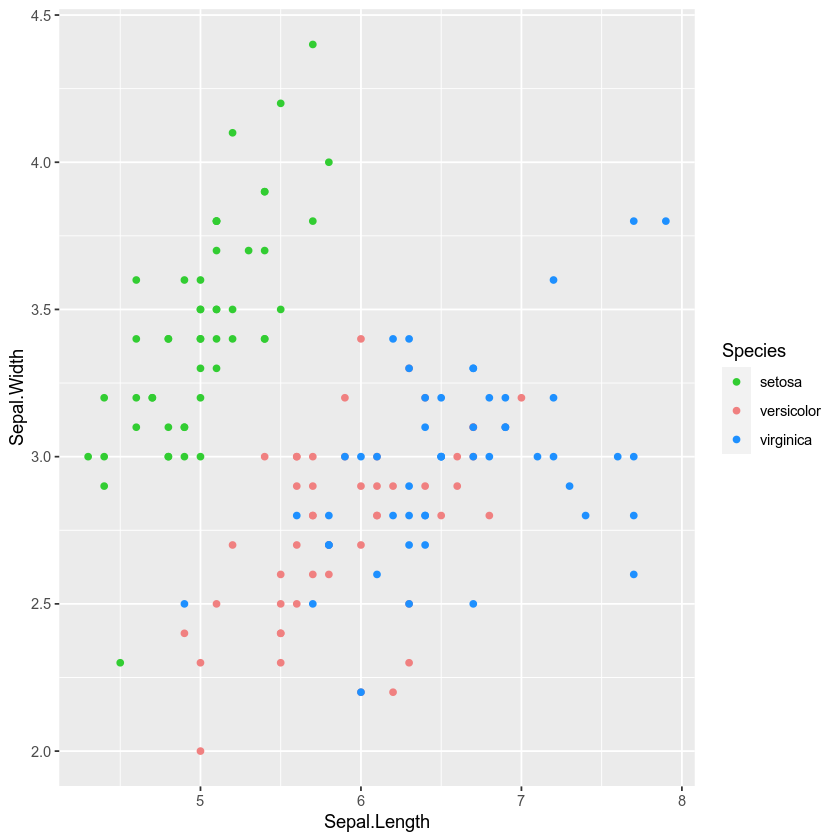

In [5]:
g<-ggplot(data = df, mapping = aes(x = Sepal.Length, 
                                   y = Sepal.Width, color = Species)) + # set up the variables to plot
geom_point()+scale_color_manual(values = c('limegreen', 'lightcoral', 'dodgerblue'))
g

Finally, suppose we want to change the order of the species in our legend and/or change the colors that match each category. There are many options to do this (e.g., manually customize the legend labels, change the order of the specified colors). We will proceed with setting the Species column as an "ordered" categorical variable, as this allows the most flexibility and can be used in other plots without additional code. 

We can see that right now, the Species column is a string rather than a categorical variable:

In [6]:
typeof(df$Species)

[1] "character"

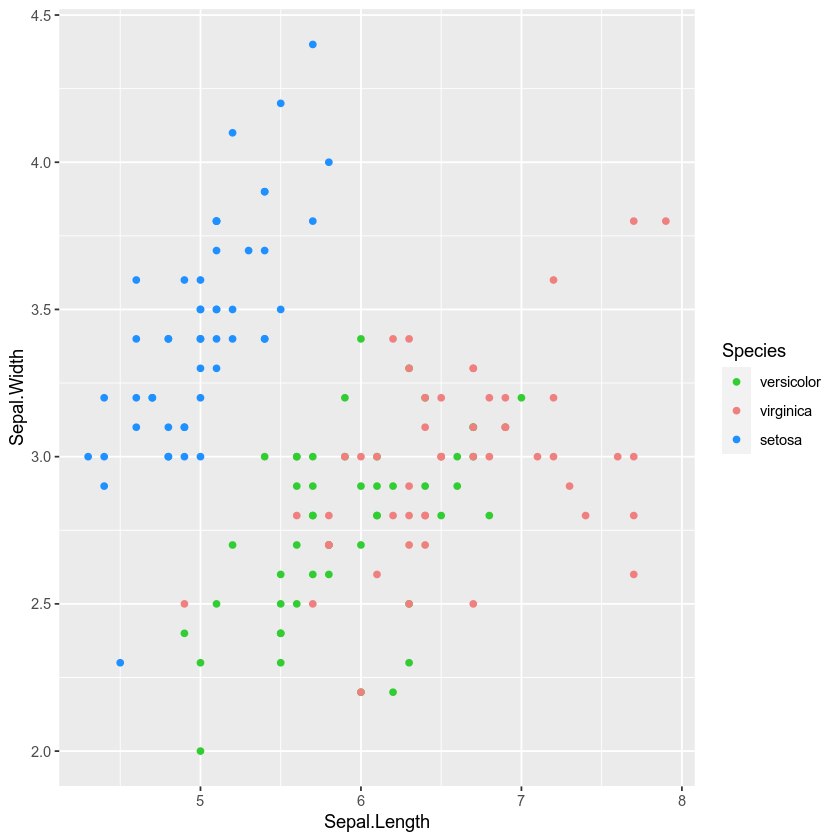

In [7]:
df$Species<-factor(x = df$Species, levels = c('versicolor', 'virginica', 'setosa')) # set the categories

g<-ggplot(data = df, mapping = aes(x = Sepal.Length, 
                                   y = Sepal.Width, color = Species)) + # set up the variables to plot
geom_point()+scale_color_manual(values = c('limegreen', 'lightcoral', 'dodgerblue'))
g

Now, suppose we wanted to visualize each species in a separate subplot instead. We can do this by faceting:

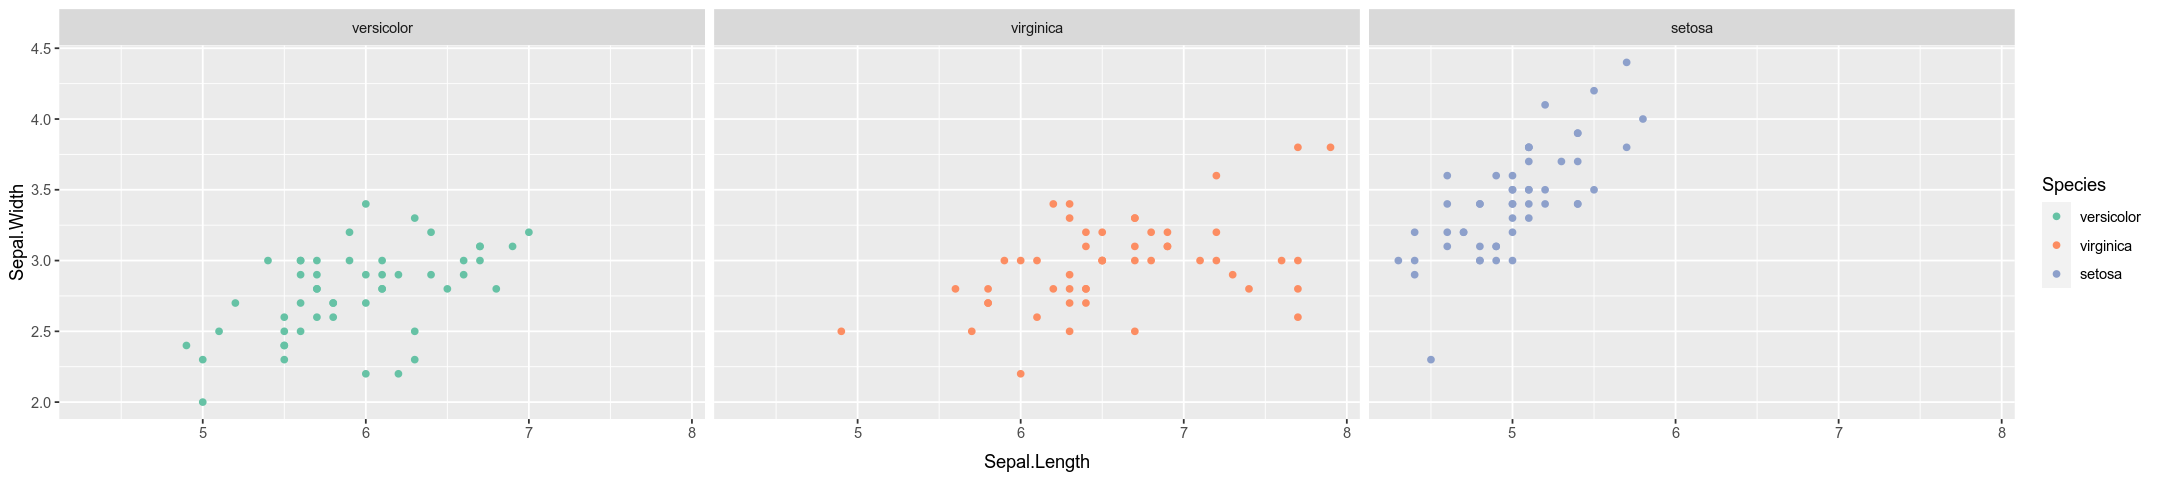

In [8]:
h_ = 4
w_ = 18
options(repr.plot.height=h_, repr.plot.width=w_) # set the figure dimensions

g<-ggplot(data = df, mapping = aes(x = Sepal.Length, 
                                   y = Sepal.Width, color = Species)) + # set up the variables to plot
geom_point()+scale_color_brewer(palette = 'Set2')+facet_wrap(~Species)
g

Note that the order of the species categories is maintained form when we set it as a categorical variable.

## Overlaying multiple plot types

We can also visualize different plot types on the same figure. Suppose we want to also regress the sepal width on the sepal length. We can combine a regression and scatter plot on one figure. Note that scatterplots tend to be an optional argument within the regression plot arguments, but the same concept of overlaying plot types can be extended to other visualizations where that is not the case.

`geom_smooth()` using formula 'y ~ x'



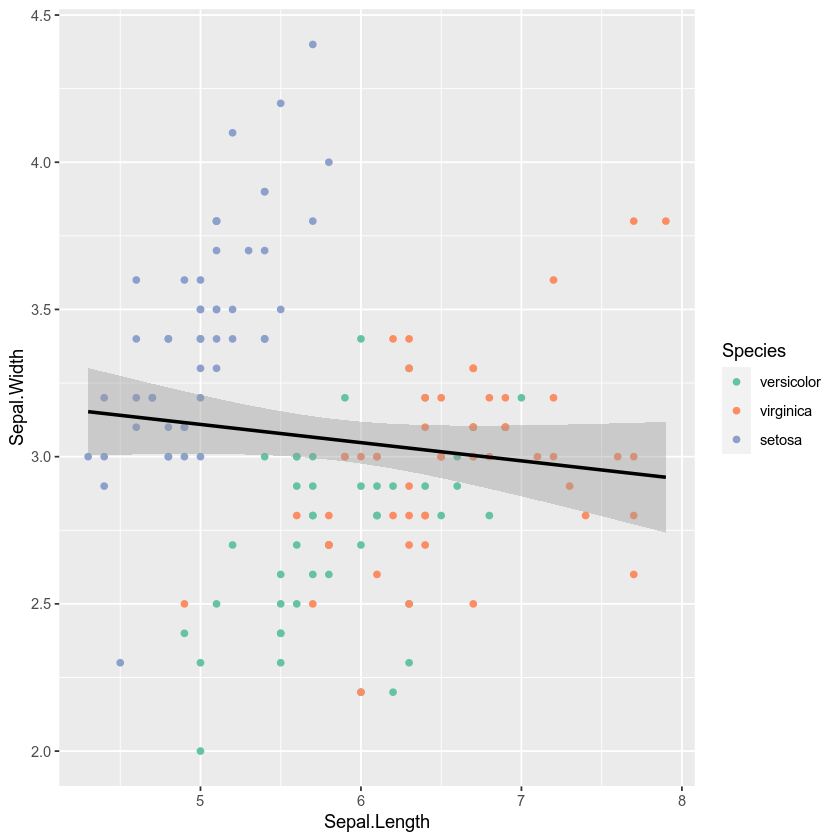

In [9]:
h_ = 7
w_ = 7
options(repr.plot.height=h_, repr.plot.width=w_) # set the figure dimensions

g<-ggplot(data = df, mapping = aes(x = Sepal.Length, y = Sepal.Width)) + # set up the variables to plot
# we only want to color by species in the scatter plot, so we will specify it within the scatterplot function
geom_point(aes(color = Species))+scale_color_brewer(palette = 'Set2')+
geom_smooth(method='lm', color = 'black') # linear regression
g


We can also do the same thing, but on each categorical variable separately:

`geom_smooth()` using formula 'y ~ x'



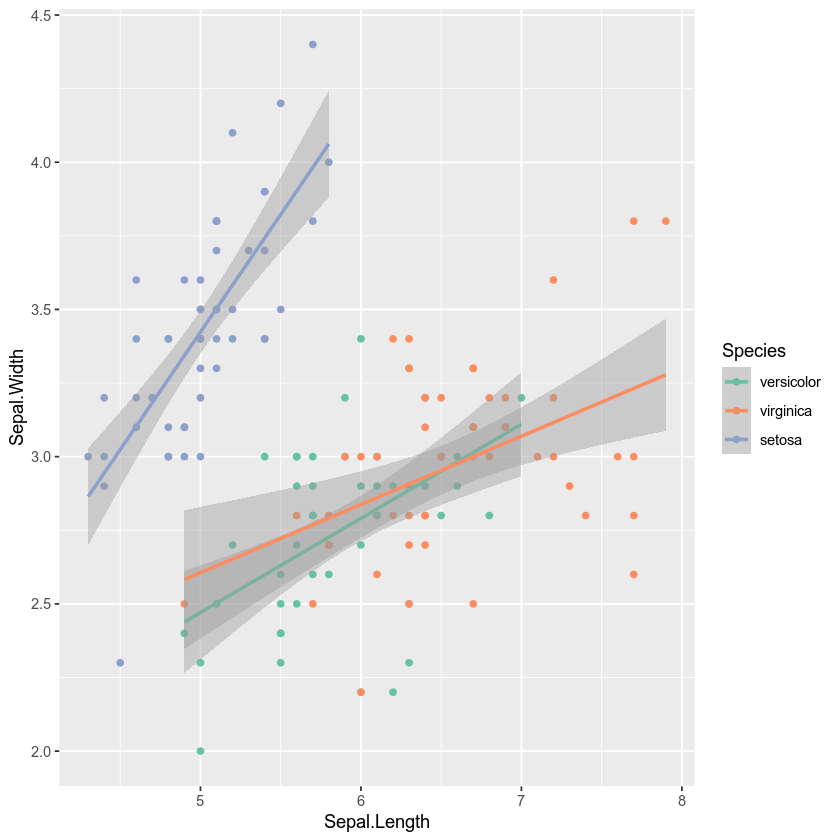

In [10]:
h_ = 7
w_ = 7
options(repr.plot.height=h_, repr.plot.width=w_) # set the figure dimensions

g<-ggplot(data = df, mapping = aes(x = Sepal.Length, y = Sepal.Width, color = Species)) + # set up the variables to plot
# specifying the color in the mapping will automatically apply it to both plot types
geom_point(aes(color = Species))+
geom_smooth(method='lm')+ # linear regression
scale_color_brewer(palette = 'Set2')
g

## Manipulating Aesthetics

Many of the figure aesthetics can be manipulated by the guide() and theme(). 

### Customizing the Legend

Let's begin with our core scatter plot, but 1) place the legend on the top right of the figure, outside of the plot, 2) change the legend title to 'Category', 3) change the legend's text fonts, and 4) change the category labels to 'A', 'B', 'C':

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



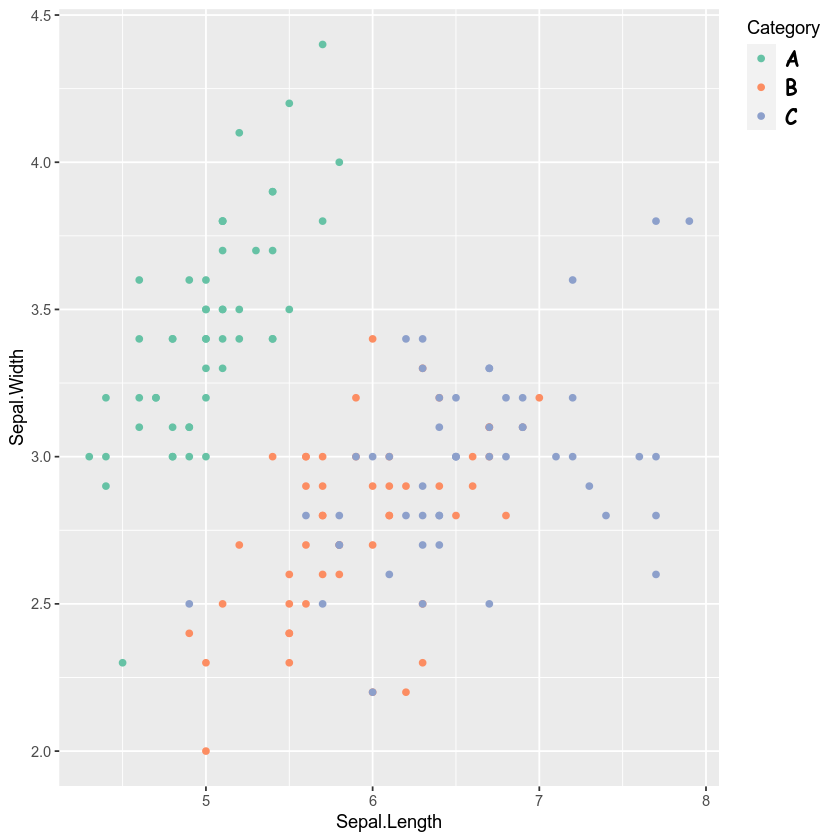

In [11]:
guide_ = guide_legend(label.theme = element_text(face = 'bold', size = 12, 
                                                 family = 'Comic Sans MS'),# change the fonts
                      title = 'Category' # change the title
                     )

g.legend<-g.main + # figure we previously created
scale_color_brewer(palette = 'Set2', # must respecify palette since this function overwrites original
                            labels = c('A', 'B', 'C'), # change the category labels
                           guide = guide_)+
theme(legend.justification = "top") # move the legend

g.legend


### Changing axis labels

We can 1) rotate the x axis tick labels, 2) rename the x axis tick labels alphabetically, 3) rename the axes labels to include spaces, 4) and add a figure title

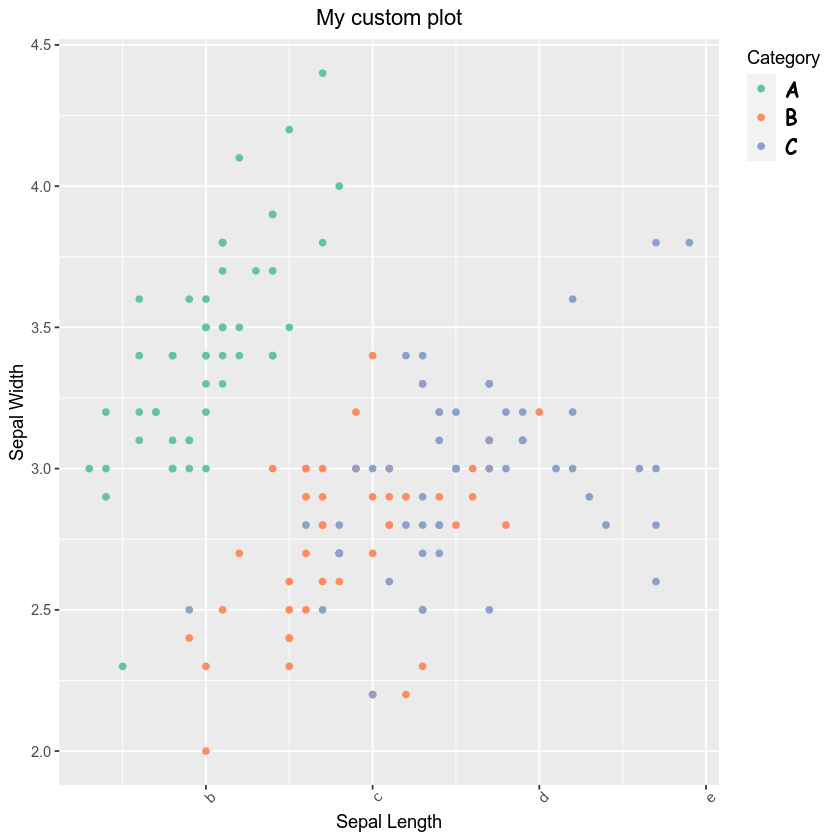

In [12]:
g.axis<-g.legend+ # figure we previously created
scale_x_continuous(breaks = seq(5,8,1), labels= letters[2:5])+ # relabel ticks
theme(axis.text.x = element_text(angle = 45))+ # rotate
xlab('Sepal Length') + ylab('Sepal Width')+ # relabel axes to include spaces
ggtitle('My custom plot')+theme(plot.title = element_text(hjust = 0.5)) # add a figure title and center it
g.axis